In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import sqlalchemy
#from sqlalchemy.ext.automap import automap_base
#from sqlalchemy.orm import Session
#from sqlalchemy import create_engine, func, inspect
import sqlite3

import pymysql
pymysql.install_as_MySQLdb()

In [3]:
conn = sqlite3.connect("../db/stock.sqlite")
stock_df = pd.read_sql_query("SELECT Name, Date, Open, Close FROM master", conn)


split_date = stock_df["Date"].str.split("-", n = 1, expand = True)
open = stock_df["Open"]
close = stock_df["Close"]
percent_change = ((close - open)/open)*100

ticker_df = pd.DataFrame({
    "Name": stock_df["Name"],
    "Date": stock_df["Date"],
    "Year": split_date[0],
    "Month-Day": split_date[1],
    "Open": stock_df["Open"],
    "Close": stock_df["Close"],
    "Percent Change": percent_change
    })
ticker_df

,Name,Date,Year,Month-Day,Open,Close,Percent Change
0,AAPL,1980-12-12,1980,12-12,0.51,0.51,0.000000
1,AAPL,1980-12-15,1980,12-15,0.49,0.49,0.000000
2,AAPL,1980-12-16,1980,12-16,0.45,0.45,0.000000
3,AAPL,1980-12-17,1980,12-17,0.46,0.46,0.000000
4,AAPL,1980-12-18,1980,12-18,0.48,0.48,0.000000
5,AAPL,1980-12-19,1980,12-19,0.50,0.50,0.000000
6,AAPL,1980-12-22,1980,12-22,0.53,0.53,0.000000
7,AAPL,1980-12-23,1980,12-23,0.55,0.55,0.000000
8,AAPL,1980-12-24,1980,12-24,0.58,0.58,0.000000
9,AAPL,1980-12-26,1980,12-26,0.63,0.63,0.000000


In [35]:
unique_tickers = stock_df["Name"].unique()
unique_tickers

array(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

In [58]:
# Create empty lists
name = []
max_overall = []
max_overall_date = []
min_overall = []
min_overall_date = []
max_avg = []
max_avg_date = []
min_avg = []
min_avg_date = []

for x in unique_tickers:
    
    ticker_data = ticker_df.loc[ticker_df['Name'] == x]
    
    name.append(ticker_data['Name'].unique()[0])
    
    # Find the maximum percent change for all dates
    max_change = ticker_data["Percent Change"].max()

    max_overall.append(max_change)
    
    # Find the minimum percent change for all dates
    min_change = ticker_data["Percent Change"].min()
    
    min_overall.append(min_change)
    
    # Find the date of the maximum percent change
    max_change_date = ticker_data.loc[ticker_data["Percent Change"] == max_change]["Date"]
    
    max_overall_date.append(max_change_date.max())
    
    # Find the date of the minimum percent change
    min_change_date = ticker_data.loc[ticker_data["Percent Change"] == min_change]["Date"]
    
    min_overall_date.append(min_change_date.min())
    
    # Find the average daily change for each date
    date_change_avg = ticker_data.groupby(["Month-Day"]).agg(
    {
        "Percent Change":"mean"
    
    })["Percent Change"]
    
    date_change_avg_df = pd.DataFrame({
        "Average Daily Percent Change": date_change_avg
    })
    
    date_change_avg_final = date_change_avg.reset_index(drop=False)
    
    # Find the max average change
    max_avg_change = date_change_avg.max()
    
    max_avg.append(max_avg_change.max())
    
    # Find the month and day for the max average change
    max_average_date = date_change_avg_final.loc[date_change_avg_final["Percent Change"] == max_avg_change]["Month-Day"]
    
    max_avg_date.append(max_average_date.min())
    
    # Find the min average change
    min_avg_change = date_change_avg.min()
    
    min_avg.append(min_avg_change.min())

    # Find the month and day for the max average change
    min_average_date = date_change_avg_final.loc[date_change_avg_final["Percent Change"] == min_avg_change]["Month-Day"]
    
    min_avg_date.append(min_average_date.min())
    

stock_results_df = pd.DataFrame(list(zip(name, max_overall, max_overall_date, \
                                         min_overall, min_overall_date, max_avg, \
                                         max_avg_date, min_avg, min_avg_date)))

stock_results_df  = stock_results_df.rename(columns={stock_results_df.columns[0]: "Stock Name", \
                                                     stock_results_df.columns[1]: "Highest Percent Change", \
                                                     stock_results_df.columns[2]: "Date of Highest Percent Change", \
                                                     stock_results_df.columns[3]: "Lowest Percent Change", \
                                                     stock_results_df.columns[4]: "Date of Lowest Percent Change", \
                                                     stock_results_df.columns[5]: "Highest Average Change for a Specific Date", \
                                                     stock_results_df.columns[6]: "Date of Highest Average Change", \
                                                     stock_results_df.columns[7]: "Lowest Average Change for a Specific Date", \
                                                     stock_results_df.columns[8]: "Date of Lowest Average Change"})    
stock_results_df.head()


,Stock Name,Highest Percent Change,Date of Highest Percent Change,Lowest Percent Change,Date of Lowest Percent Change,Highest Average Change for a Specific Date,Date of Highest Average Change,Lowest Average Change for a Specific Date,Date of Lowest Average Change
0,AAPL,28.767123,1997-08-06,-40.401146,2000-09-28,1.380025,10-13,-1.597587,09-28
1,AXP,15.518207,2009-04-15,-14.701258,2008-09-29,0.816883,09-16,-0.753304,02-29
2,BA,10.551836,1997-10-28,-9.147870,1997-10-27,0.594734,04-12,-0.607170,10-27
3,CAT,12.317881,2009-03-04,-9.583725,2018-04-24,0.628324,04-12,-0.668531,02-23
4,CSCO,25.638686,2001-01-03,-14.258794,1998-08-31,1.618842,01-03,-1.218477,02-27


In [83]:
# Group by a specific ticker name
ticker_data = ticker_df.loc[ticker_df['Name'] == "V"]
ticker_data.head()

,Name,Date,Year,Month-Day,Open,Close,Percent Change
271061,V,2008-03-19,2008,03-19,15.30,14.13,-7.647059
271062,V,2008-03-20,2008,03-20,14.60,16.09,10.205479
271063,V,2008-03-24,2008,03-24,16.81,14.93,-11.183819
271064,V,2008-03-25,2008,03-25,15.15,15.81,4.356436
271065,V,2008-03-26,2008,03-26,15.68,15.99,1.977041


In [84]:
# Isolate date, open, and close columns from dataframe
date = ticker_data["Date"]
open = ticker_data["Open"]
close = ticker_data["Close"]

# Create the daily change by subtracting the opening price from the closing price
daily_change = close - open

percent_change = (daily_change/open)*100

# # Create a dataframe that displays all this information
# daily_change_df = pd.DataFrame({
#      "Date": date,
#      "Daily Change": daily_change
# })
# daily_change_df.head()

In [85]:
# Split the date column 
split_date = ticker_data["Date"].str.split("-", n = 1, expand = True) 

# Create a dataframe that displays all this information
percent_change_df = pd.DataFrame({
    "Year": split_date[0],
    "Month-Day": split_date[1],
    "Date": date,
    "Percent Change": percent_change
})
percent_change_df.head()

,Year,Month-Day,Date,Percent Change
271061,2008,03-19,2008-03-19,-7.647059
271062,2008,03-20,2008-03-20,10.205479
271063,2008,03-24,2008-03-24,-11.183819
271064,2008,03-25,2008-03-25,4.356436
271065,2008,03-26,2008-03-26,1.977041


In [86]:
# Find the maximum percent change of all dates
max_change = percent_change_df["Percent Change"].max()

max_change

14.014752370916755

In [87]:
# Find the minimum percent change of all dates
min_change = percent_change_df["Percent Change"].min()

min_change

-12.953367875647666

In [88]:
# Find the corresponding date to this maximum change
max_change_date = percent_change_df.loc[percent_change_df["Percent Change"] == max_change]
max_change_date

,Year,Month-Day,Date,Percent Change
271889,2011,06-29,2011-06-29,14.014752


In [89]:
# Find the corresponding date to this maximum change
min_change_date = percent_change_df.loc[percent_change_df["Percent Change"] == min_change]
min_change_date

,Year,Month-Day,Date,Percent Change
271755,2010,12-16,2010-12-16,-12.953368


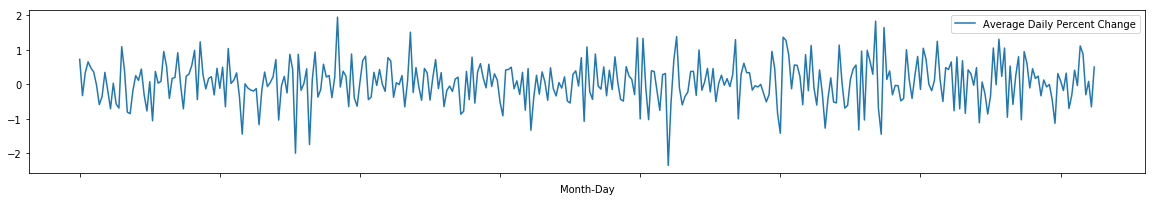

In [90]:
# Find the average daily change for each date
date_change_avg = percent_change_df.groupby(["Month-Day"]).agg(
{
        "Percent Change":"mean"
    
})["Percent Change"]

# Change the series to a dataframe
date_change_avg_df = pd.DataFrame({
    "Average Daily Percent Change": date_change_avg
})

plot = date_change_avg_df.plot.line(figsize=(20,3))

In [111]:
# Find the maximum average daily change
max_avg_change = date_change_avg_df["Average Daily Percent Change"]
a = percent_change_df.groupby(["Month-Day"])["Percent Change"].mean()
a

Month-Day
01-02    0.725105
01-03   -0.329163
01-04    0.337476
01-05    0.652038
01-06    0.478710
01-07    0.357016
01-08   -0.018336
01-09   -0.589840
01-10   -0.353111
01-11    0.345889
01-12   -0.169996
01-13   -0.710974
01-14    0.031547
01-15   -0.568939
01-16   -0.691749
01-17    1.092246
01-18    0.392394
01-19   -0.809015
01-20   -0.854285
01-21   -0.176602
01-22    0.251439
01-23    0.114557
01-24    0.444171
01-25   -0.304269
01-26   -0.775860
01-27    0.075674
01-28   -1.059578
01-29    0.373939
01-30    0.034014
01-31    0.083146
           ...   
12-01   -0.582671
12-02    0.253241
12-03    0.801895
12-04   -1.032020
12-05    0.950413
12-06    0.606689
12-07   -0.106465
12-08    0.452128
12-09    0.169781
12-10    0.238379
12-11   -0.334584
12-12    0.125616
12-13   -0.076672
12-14   -0.006194
12-15   -0.445479
12-16   -1.133240
12-17    0.313474
12-18    0.100248
12-19   -0.182121
12-20    0.324593
12-21   -0.703180
12-22   -0.312803
12-23    0.409347
12-24   -0.036648


In [56]:
# Find the minimum average daily change
min_avg_change = date_change_avg_df["Average Daily Percent Change"].min()

min_avg_change

-2.356545711966926

In [60]:
# Find the corresponding date to this maximum average change
max_avg_change_date = date_change_avg_df.loc[date_change_avg_df["Average Daily Percent Change"] == max_avg_change]
max_avg_change_date

,Average Daily Percent Change
Month-Day,
04-03,1.951403


In [61]:
# Find the corresponding date to this minimum average change
min_avg_change_date = date_change_avg_df.loc[date_change_avg_df["Average Daily Percent Change"] == min_avg_change]
min_avg_change_date

,Average Daily Percent Change
Month-Day,
07-31,-2.356546


In [56]:
last_year_df = percent_change_df.loc[percent_change_df['Year'] == "2018"]
last_year_df.head()

,Year,Month-Day,Percent Change
192088,2018,01-02,1.234133
192089,2018,01-03,-0.173883
192090,2018,01-04,0.283992
192091,2018,01-05,0.899446
192092,2018,01-08,0.000000


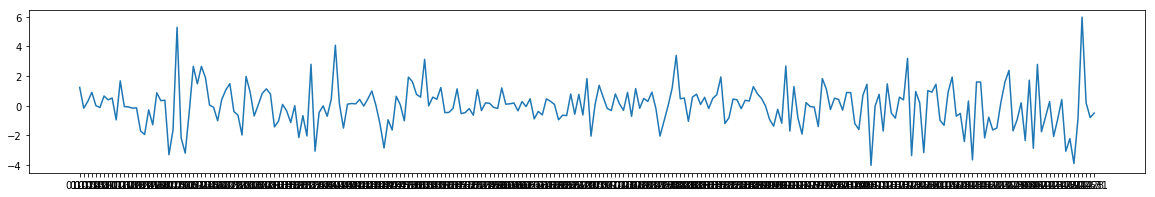

In [57]:
# Build a line chart that shows the daily change over time for the specific stock

plt.figure(figsize=(20,3))
plt.plot(last_year_df['Month-Day'], last_year_df['Percent Change'])
plt.show()